# Technical Analysis API for Idle Trading Hero

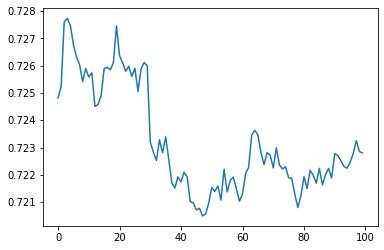

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

with open('data/data2/AUD_USD-1588780800-H1-10000.json') as f:
    data = json.load(f)
d = {r: [dic[r] for dic in data] for r in data[0]}
df = pd.DataFrame(d)

plt.plot(df['O'][:100])
plt.show()

In [2]:
df

,Complete,Volume,Time,O,H,L,C
0,True,268,1537920000,0.72482,0.72554,0.72461,0.72518
1,True,881,1537923600,0.72524,0.72770,0.72482,0.72758
2,True,331,1537927200,0.72760,0.72832,0.72735,0.72772
3,True,215,1537930800,0.72774,0.72782,0.72742,0.72748
4,True,171,1537934400,0.72748,0.72748,0.72682,0.72682
...,...,...,...,...,...,...,...
9995,True,338,1588762800,0.64378,0.64447,0.64338,0.64426
9996,True,887,1588766400,0.64430,0.64474,0.64304,0.64446
9997,True,1003,1588770000,0.64450,0.64528,0.64370,0.64437
9998,True,1544,1588773600,0.64434,0.64458,0.64236,0.64295


# Moving Average Convergence/Divergence (MACD) Oscillator

MACD is a trend-following momentum indicator that indicates crossovers and divergences. MACD crossing over its signal indicates buy while MACD crossing below its signal indicates sell.

Ref: https://www.investopedia.com/terms/m/macd.asp

In [3]:
from algorithms import Algorithm, MACDStrategy

In [ ]:
macd = MACDStrategy(parameters={
                        'ema26': 26,
                        'ema12': 12,
                        'ema9': 9,
                    })
algo = Algorithm(indicator=df.loc[:9999],
                 strategy=macd,
                 capital=1000)

C:\Users\notes\Anaconda3\envs\quant\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sign
  result = getattr(ufunc, method)(*inputs, **kwargs)


{'Volume': 985.0, 'Time': 1588777200.0, 'O': 0.64298, 'H': 0.64349, 'L': 0.64068, 'C': 0.64148, 'action': 0.0, 'balance_change': -0.0, 'stock': 0.0, 'balance': 1000.50087, 'return': 0.5008699999999635, 'alpha': 0.0005008699999999635, 'sharpe': -0.26071061994077255, 'annual_sharpe': -4.138652787100567, 'sortino': -0.6364848014475915}


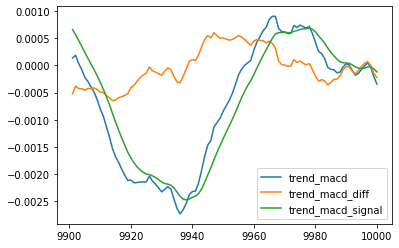

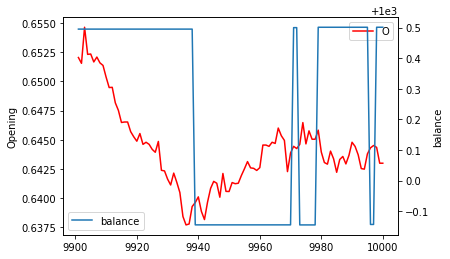

In [5]:
algo.act(df.loc[9999])
print(algo.statistics())
algo.plot_indicators(k=100)
algo.plot_performance(k=100)

# Money Flow Index (MFI)

The MFI is a technical oscillator that uses price and volume to identify overbought or oversold signals, and moves between 0 and 100.
A MFI above 80 is considered overbought and signals buy while a MFI below 20 is considered oversold and signals sell.

Ref: https://www.investopedia.com/terms/m/mfi.asp

In [7]:
from algorithms import Algorithm, MFIStrategy

mfi = MFIStrategy(parameters={
                    'mfi80': 80,
                    'mfi20': 20,
                    })
algo = Algorithm(indicator=df.loc[:9998],
                 strategy=mfi,
                 capital=1000)

Complete                 True
Volume                    985
Time               1588777200
O                     0.64298
H                     0.64349
L                     0.64068
C                     0.64148
volume_mfi            47.3906
volume_mfi_prev       56.9187
sell                        0
buy                         0
action                      0
balance_change              0
stock                       4
balance               996.881
return               -3.11866
alpha             -0.00311866
sharpe               -1.55685
annual_sharpe        -24.7143
sortino              -1.61595
Name: 9999, dtype: object


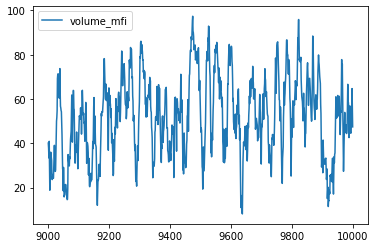

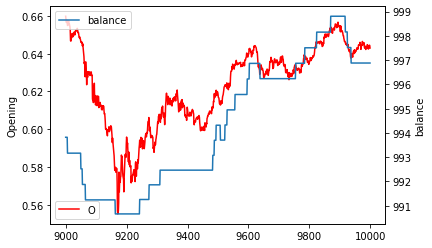

In [8]:
algo.act(df.loc[9999])
print(algo.statistics())
algo.plot_indicators(k=1000)
algo.plot_performance(k=1000)

# Relative Strength Index (RSI)

RSI is a momentum indicator that measures magnitude of recent price changes to evaluate overbought/oversold conditions, and range from 0 to 100. RSI >= 70 indicate overbought and sell while RSI <= 30 indicate oversold and buy.

Ref: https://www.investopedia.com/terms/r/rsi.asp

In [9]:
from algorithms import Algorithm, RSIStrategy

rsi = RSIStrategy(parameters={
                    'rsi70': 70,
                    'rsi30': 30,
                    })
algo = Algorithm(indicator=df.loc[:9999],
                 strategy=rsi,
                 capital=1000)

Complete                   True
Volume                      985
Time                 1588777200
O                       0.64298
H                       0.64349
L                       0.64068
C                       0.64148
momentum_rsi            39.8879
momentum_rsi_prev       39.8879
sell                          0
buy                           0
action                        0
balance_change                0
stock                        27
balance                 981.975
return                 -18.0248
alpha                -0.0180248
sharpe                 -1.57877
annual_sharpe          -25.0622
sortino                -1.66398
Name: 10000, dtype: object


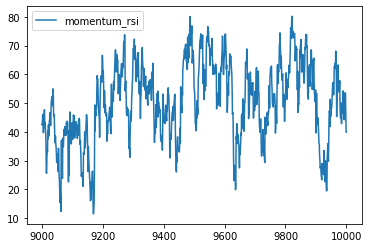

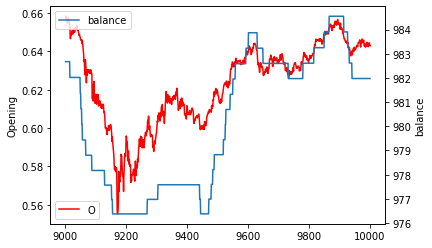

In [10]:
algo.act(df.loc[9999])
print(algo.statistics())
algo.plot_indicators(k=1000)
algo.plot_performance(k=1000)